In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV

### importing and describing your data

In [12]:
df = pd.read_csv("/kaggle/input/earthquake-database/database.csv")

In [13]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [14]:
df.head(3)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic


### keeping the important columns 

In [15]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [16]:
df = df[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
df.head(3)

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2


In [17]:
df.head(3)

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2


In [18]:
timestamp = []
for d, t in zip(df['Date'], df['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')
timeStamp = pd.Series(timestamp)
df['Timestamp'] = timeStamp.values
df = df.drop(['Date', 'Time'], axis=1)
df = df[df.Timestamp != 'ValueError']
df.head(3)

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-157630542.0
1,1.863,127.352,80.0,5.8,-157465811.0
2,-20.579,-173.972,20.0,6.2,-157355642.0


In [19]:
!pip install basemap
!pip install basemap-data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.0/866.0 kB 9.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 32.3 MB/s eta 0:00:0000:0100:01


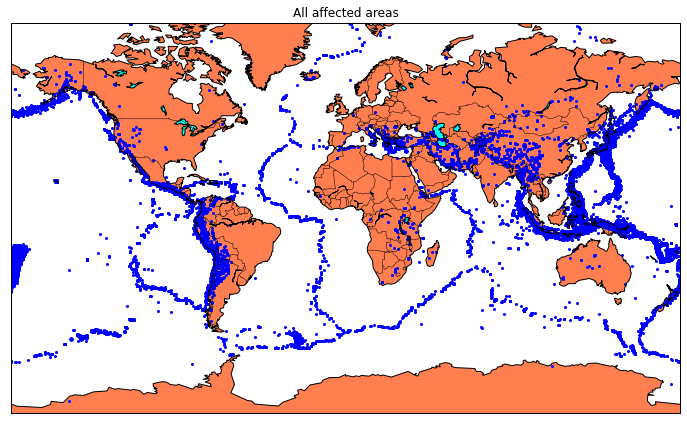

In [20]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = df["Longitude"].tolist()
latitudes = df["Latitude"].tolist()

x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

### splitting the dataset

In [21]:
df.columns

Index(['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Timestamp'], dtype='object')

In [22]:
X = df[['Latitude', 'Longitude', 'Timestamp']]
y = df[['Depth', 'Magnitude']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(18727, 3) (4682, 3) (18727, 2) (4682, 3)


In [23]:
from keras.models import Sequential
from keras.layers import Dense

# 3 dense layers, 16, 16, 2 nodes each

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

### hyperparameter tuning

In [24]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

# param_grid = {
#     "neurons": [16, 64], 
#     "batch_size": [10, 20], 
#     "epochs": [10],
#     "activation": ['sigmoid', 'relu'],
#     "optimizer": ['SGD', 'Adadelta'],
#     "loss": ['squared_hinge']
# }
param_grid = {
    "neurons": [16], 
    "batch_size": [10, 20], 
    "epochs": [10],
    "activation": ['sigmoid', 'relu'],
    "optimizer": ['SGD', 'Adadelta'],
    "loss": ['squared_hinge']
}

In [25]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [26]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

best_params = grid_result.best_params_
best_params

{'activation': 'sigmoid',
 'batch_size': 20,
 'epochs': 10,
 'loss': 'squared_hinge',
 'neurons': 16,
 'optimizer': 'SGD'}

### final neural network model built

In [27]:
model = Sequential()
model.add(Dense(16, activation=best_params['activation'], input_shape=(3,)))
model.add(Dense(16, activation=best_params['activation']))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=best_params['optimizer'], loss=best_params['loss'], metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=best_params['batch_size'], epochs=best_params['epochs'], verbose=1, validation_data=(X_test, y_test))

[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/10
937/937 [==============================] - 3s 2ms/step - loss: 0.0038 - accuracy: 0.9816 - val_loss: 0.0039 - val_accuracy: 0.9816
Epoch 2/10
937/937 [==============================] - 2s 2ms/step - loss: 0.0038 - accuracy: 0.9816 - val_loss: 0.0039 - val_accuracy: 0.9816
Epoch 3/10
937/937 [==============================] - 2s 2ms/step - loss: 0.0038 - accuracy: 0.9816 - val_loss: 0.0039 - val_accuracy: 0.9816
Epoch 4/10
937/937 [==============================] - 2s 2ms/step - loss: 0.0038 - accuracy: 0.9816 - val_loss: 0.0039 - val_accuracy: 0.9816
Epoch 5/10
937/937 [==============================] - 2s 2ms/step - loss: 0.0038 - accuracy: 0.9816 - val_loss: 0.0039 - val_accuracy: 0.9816
Epoch 6/10
937/937 [==============================] - 2s 2ms/step - loss: 0.0038 - accuracy: 0.9816 - val_loss: 0.0039 - val_accuracy: 0.9816
Epoch 7/10
937/937 [==============================] - 2s 2ms/step - loss: 0.0038 - accuracy: 0.9816 - val_loss: 0.0039 - val_accuracy: 0.9816
Epoch 